In [2]:
import numpy as np
from functionalD import EDF
import sympy as sp
sp.init_printing()

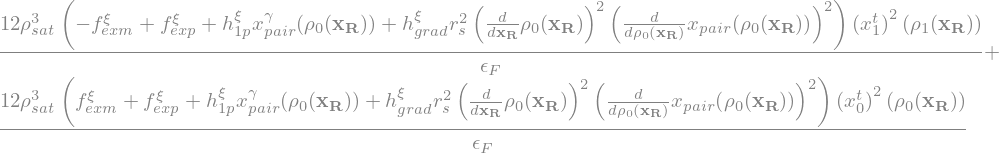

In [4]:
from sympy.physics.vector import dynamicsymbols
from sympy.vector import CoordSys3D, Del, gradient, divergence, matrix_to_vector
from sympy.abc import rho, I, W, P, tau, pi, m, gamma,r, theta, phi, kappa, g, xi, sigma

hbar = 197.327  # MeV-fm
m = 940  # MeV

R = CoordSys3D('R')
rho_n, rho_p, rho_0, rho_1, rho_sat = sp.symbols("rho_n, rho_p, rho_0, rho_1, rho_sat")
# Define multiple functions of the same variable
rho_0 = sp.Function('rho_0')(R.x)#(R.x, R.y, R.z)
rho_1 = sp.Function('rho_1')(R.x)#(R.x, R.y, R.z)
# rho_n, rho_p, rho_c = Tuple(*dynamicsymbols("rho_n, rho_p, rho_c")).subs(t, (R.x, R.y, R.z))

a_p__v, h_1_p__v,h_2_p__v, x_0, epsilon_F = sp.symbols("a_p__v, h_1_p__v,h_2_p__v, x_0, epsilon_F")
a_m__v, h_1_m__v,h_2_m__v, x_1 = sp.symbols("a_m__v, h_1_m__v,h_2_m__v, x_1")
a_p__s, a_m__s, h_grad__s, r_s, h_p__s, h_m__s = sp.symbols("a_p__s, a_m__s, h_grad__s, r_s, h_p__s, h_m__s")
J_0, J_1, g__p, kappa__p = sp.symbols("J_0, J_1, g__p, kappa__p")
rhotilde_0,rhotilde_1, f_ex_p__xi, f_ex_m__xi = sp.symbols("rho_0__a, rho_1__a, f_ex_p__xi, f_ex_m__xi")
h_1_p__xi, x_pair, h_grad__xi, = sp.symbols("h_1_p__xi, x_pair, h_grad__xi")
gradxpair = sp.symbols("gradx_pair")

# rho_n = rho_0/2
# rho_p = rho_0/2
I = (rho_n - rho_p)/rho_0

twoOverThree = sp.Rational(2,3)
oneOverThree = sp.Rational(1, 3)

tau_0 = sp.symbols('tau_0', cls = sp.Function)(rho_0)
x_0 = sp.symbols('x_0', cls = sp.Function)(rho_0)
x_1 = sp.symbols('x_1', cls=sp.Function)(rho_1)
x_0__t = sp.symbols('x_0__t', cls = sp.Function)(rho_0)
x_1__t = sp.symbols('x_1__t', cls=sp.Function)(rho_1)
x_pair = sp.symbols('x_pair', cls=sp.Function)(rho_0)
gradx0 = sp.symbols('gradx0', cls=sp.Function)(x_0)
gradx1 = sp.symbols('gradx1', cls=sp.Function)(x_1)


# Pairing term
gradxpair = sp.vector.gradient(x_pair)
gradxterm = gradxpair.dot(gradxpair)
# gradxterm = gradxpair**2
terma = 4/epsilon_F * 3 *rho_sat**3 *x_0__t**2*(f_ex_p__xi + f_ex_m__xi +  h_1_p__xi*x_pair**gamma + h_grad__xi*r_s**2*gradxterm) 
termb = 4/epsilon_F * 3 *rho_sat**3 *x_1__t**2*(f_ex_p__xi - f_ex_m__xi +  h_1_p__xi*x_pair**gamma + h_grad__xi*r_s**2*gradxterm) 
term = terma + termb

funcs = [tau_0, rho_n, rho_p, rho_0, rho_1, gradx0, gradx1]

vars = ["x_0", "x_1", "x_pair", "x_0__t", "x_1__t", "gradx0", "gradx1", "gradxpair"]
epsilon_F = sp.symbols("epsilon_F")

coeffList = {"a_p__v": a_p__v, "a_m__v": a_m__v, "a_p__s": a_p__s, "h_1_p__v":h_1_p__v,"h_2_p__v":h_2_p__v }



W = term
fayansEDF = EDF(vars, W, funcs, **coeffList)
fayansEDF.functional

In [7]:
fayansEDF.var

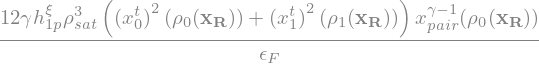

In [11]:
fayansEDF.derivative(1, x_pair)

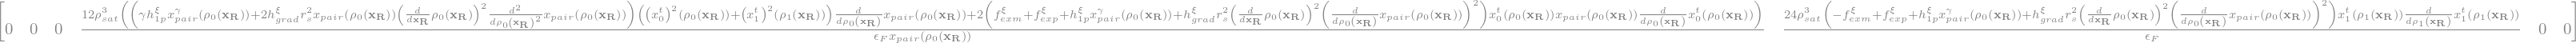

In [10]:
fayansEDF.derivative(1)